In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
raw_board= np.array([20, 1, 18, 4, 13, 6, 10, 15, 2, 17, 3, 19, 7, 16, 8, 11, 14, 9, 12, 5])

In [60]:
board_num = np.concatenate([raw_board, raw_board, raw_board])

In [61]:
one_board = 6 # size

In [62]:
def calc_e(window=1, start_point=0, only_labels=True):
    to_return = []
    for i in range(start_point, 20+start_point, window):
        target = [board_num[i+j] for j in range(window)]
        exp = np.mean(target)
        member = map(str, target)
        member = '-'.join(member)
        if only_labels == False: 
            to_return.append([member, exp])
        else:
            to_return.append(member)
        
    return to_return

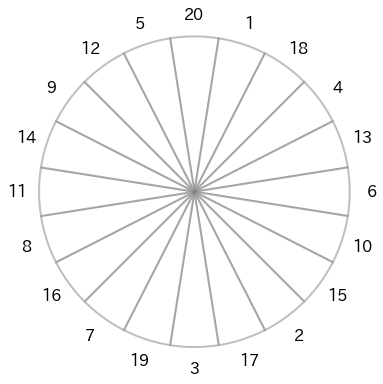

In [63]:
# http://pynote.hatenablog.com/entry/matplotlib-polor-projection
# https://scipy-lectures.org/intro/matplotlib/auto_examples/plot_polar.html
# https://fijixfiji.hatenadiary.jp/entry/20140303/1393859940

# fig = plt.figure(figsize=(one_board, one_board))
# ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar=True)
fig, ax = plt.subplots(1, 1, figsize=(one_board, one_board), subplot_kw=dict(polar=True))
ax.set_theta_direction(-1) 
ax.set_theta_offset(0.5 * np.pi)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = np.full(N, 1)
# radii = np.linspace(0, 1, 20, endpoint=False)
width = np.pi / (N/2)
bars = plt.bar(theta, radii, width=width, bottom=0.0, linewidth=2, edgecolor='gray')
# bars = plt.bar(theta, board_num[:20], width=width, bottom=0.0, linewidth=2, edgecolor='gray')
angles = np.linspace(0, 360, 20, endpoint=False)

for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.viridis(r/10.))
    bar.set_facecolor('white')
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.grid(False)
# ax.set_rgrids([])
ax.set_thetagrids(angles, labels=board_num, fontsize=16)
plt.show()
#plt.savefig('white.jpg')

In [82]:
def plot(raw_labels, ax, cm=plt.cm.jet):
    ax.set_theta_direction(-1) 
    ax.set_theta_offset(0.5 * np.pi)

    list_label = [list(map(int, label.split('-'))) for label in raw_labels]
    thetas = []
    radis = []
    widths = []
    for labels in list_label:
        split = len(labels)
        if split % 2 == 0:
            theta1 = np.where(board_num==labels[split//2 -1])[0][0] * 2*np.pi / 20
            theta2 = np.where(board_num==labels[split//2])[0][0] * 2*np.pi / 20
            if theta2 < theta1: theta2 = np.where(board_num==labels[split//2])[0][1] * 2*np.pi / 20
            theta = (theta1 + theta2)/2
        else:
            theta = np.where(board_num==labels[split//2])[0][0] * 2*np.pi / 20
        thetas.append(theta)
        widths.append(split * 2*np.pi / 20)
        radis.append(sum(labels) / split)
        
#     for r in range(5, 25, 5):
#         t = 2*np.arange( 0, 2*np.pi, 0.1)
#         ax.plot(t, np.full(t.shape, r), color='r', alpha=0.2)
    bbars = ax.bar(
        np.arange( 0, 2*np.pi, 2*np.pi/20 ), np.full(20, 20), width=2*np.pi/20,
        linewidth=1, edgecolor='lightgray', color='white')
    bars = ax.bar(thetas, radis, width=widths, bottom=0.0, linewidth=2, edgecolor='k')
    
    for i, bar in enumerate(bbars):
        t = np.arange( 0, 2*np.pi, 2*np.pi/20 )
        ax.annotate(board_num[i], (t[i], 20), xytext=(t[i], 24), fontsize=16, ha='center', va='center')
    for i, (r, bar) in enumerate(zip(radis, bars)):
        bar.set_facecolor(cm(r/20))
        bar.set_alpha(0.5)
        ax.annotate('{}\n{:.1f}'.format(raw_labels[i], radis[i]), (thetas[i], radis[i]),
                    xytext=(thetas[i], radis[i]+2), color='b',
                    ha='center', va='center')

    ax.set_frame_on(False)
    ax.set_rgrids(np.linspace(5, 20, 4), angle=88, color='r')
#     ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), ['exp: 5', '10', '15', '20'], angle=85, color='red')
    ax.set_thetagrids([])
#     ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=12)

In [65]:
def calc_e_ww(window=1):
    to_return = []
    for i, num in enumerate(raw_board):
        exp = 0
        for idx in range(window):
#             print(board_num[20+i-(window-1)+idx : 20+i+idx+1])
            exp += sum(board_num[20+i-(window-1)+idx : 20+i+idx+1])
        to_return.append([num, exp/window])
        
    return to_return

In [66]:
def plot2(exp, ax):
    ax.set_theta_direction(-1) 
    ax.set_theta_offset(0.5 * np.pi)

    list_label = [e[0] for e in exp]
    thetas = np.arange( 0, 2*np.pi, 2*np.pi/20 )
    radis = [e[1] for e in exp]
    widths = 2*np.pi/20
        
#     for r in range(5, 25, 5):
#         t = 2*np.arange( 0, 2*np.pi, 0.1)
#         ax.plot(t, np.full(t.shape, r), color='r', alpha=0.2)
    bbars = ax.bar(
        np.arange( 0, 2*np.pi, 2*np.pi/20 ), np.full(20, 1), width=2*np.pi/20,
        linewidth=1, edgecolor='lightgray', color='white')
    bars = ax.bar(thetas, radis/max(radis), width=widths, bottom=0.0, linewidth=2, edgecolor='k')
    
    for i, bar in enumerate(bbars): # board num
        t = np.arange( 0, 2*np.pi, 2*np.pi/20 )
        ax.annotate(board_num[i], (t[i], 1), xytext=(t[i], 1.2), fontsize=16, ha='center', va='center')
    for i, (r, bar) in enumerate(zip(radis, bars)): # bar
        bar.set_facecolor(plt.cm.viridis(r/max(radis)))
        bar.set_alpha(0.5)
        if r != 0.01:
            ax.annotate('{}\n{:.1f}'.format(list_label[i], radis[i]), (thetas[i], radis[i]/max(radis)),
                        xytext=(thetas[i], radis[i]/max(radis)+0.1), color='b',
                        ha='center', va='center')

    ax.set_frame_on(False)
    
#     ax.set_rgrids(np.linspace(5, 25, 4, endpoint=False), angle=90, color='red')
    ax.set_rgrids(np.linspace(0.25, 1, 4), 
                  list(map(lambda x: '{:.1f}'.format(x), np.linspace(0.25*max(radis), 1*max(radis), 4))),
                  angle=88, color='r')
    ax.set_thetagrids([])
#     ax.set_thetagrids(np.linspace(0, 360, 20, endpoint=False), labels=board_num, fontsize=12)

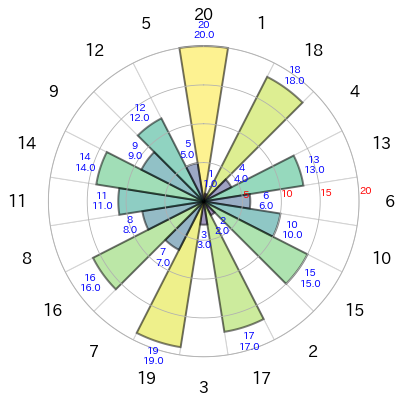

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(one_board, one_board), subplot_kw=dict(polar=True))
plot(calc_e(1, 0), ax)
plt.show()
#plt.savefig('1.jpg')

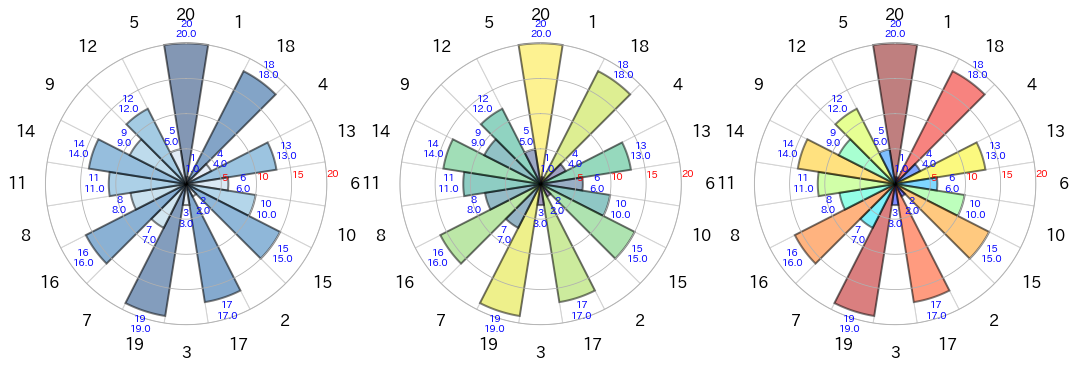

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(3*one_board, one_board), subplot_kw=dict(polar=True))
for i, cm in enumerate([plt.cm.Blues, plt.cm.viridis, plt.cm.jet, ]):
    plot(calc_e(1, 0), ax[i], cm)
plt.show()

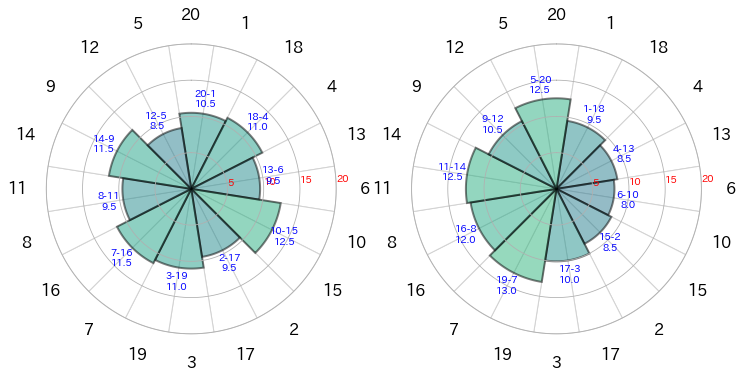

In [68]:
num = 2
fig, ax = plt.subplots(1, 2, figsize=(num*one_board, one_board), subplot_kw=dict(polar=True))
for i in range(num):
    plot(calc_e(2, i, True), ax[i])
plt.show()
#plt.savefig('2.jpg')

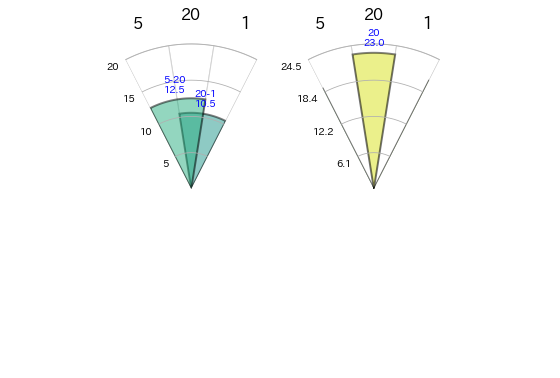

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4), subplot_kw=dict(polar=True))
plot(['20-1', '5-20'], ax[0])
ax[0].set_thetamin(-1.5*360/20)
ax[0].set_thetamax(1.5*360/20)

i = 1
a = calc_e_ww(2)
a[1] = [13, 0.01]
a[-1] = [13, 0.01]
plot2(a, ax[i])
ax[i].set_thetamin(-1.5*360/20)
ax[i].set_thetamax(1.5*360/20)

# xy = (0, 100)
# con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="polar", coordsB="polar", axesA=ax, axesB=ax2)
# ax2.add_artist(con)

# i = 1
# bbox_props = dict(boxstyle="rarrow, pad=0.3", fc="cyan", ec="b", lw=2)
# ax[i].text(0, 0, "Add", ha="center", va="center", rotation=0, size=15, bbox=bbox_props)
# ax[i].set_axis_off()

plt.show()
#plt.savefig('describe.jpg')

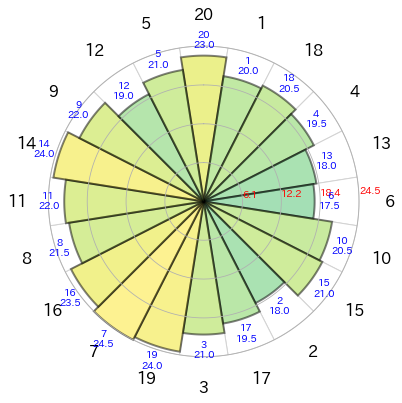

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(one_board, one_board), subplot_kw=dict(polar=True))
plot2(calc_e_ww(num), ax)
plt.show()
#plt.savefig('2w.jpg')

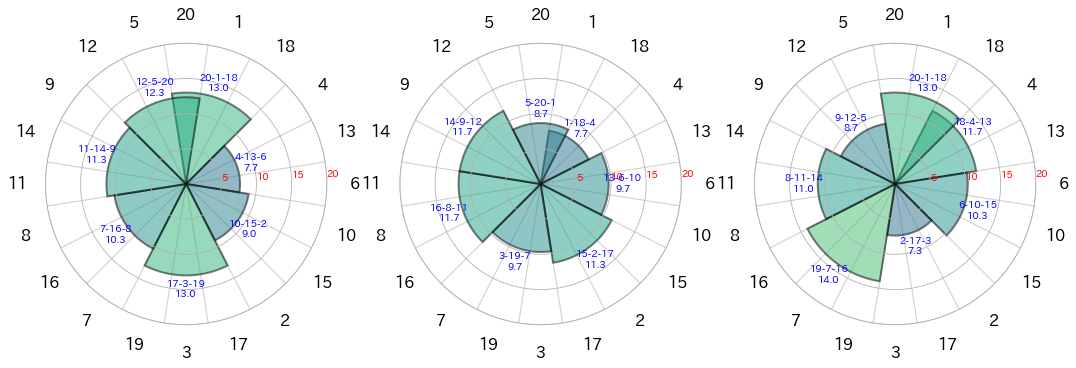

In [71]:
num = 3
fig, ax = plt.subplots(1, num, figsize=(num*one_board, one_board), subplot_kw=dict(polar=True))
for i in range(num):
    plot(calc_e(num, i, True), ax[i])
plt.show()
#plt.savefig('3.jpg', bbox_inches='tight', pad_inches=0)

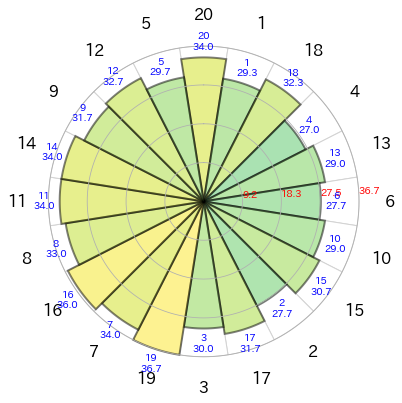

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(one_board, one_board), subplot_kw=dict(polar=True))
plot2(calc_e_ww(num), ax)
plt.show()
#plt.savefig('3w.jpg')

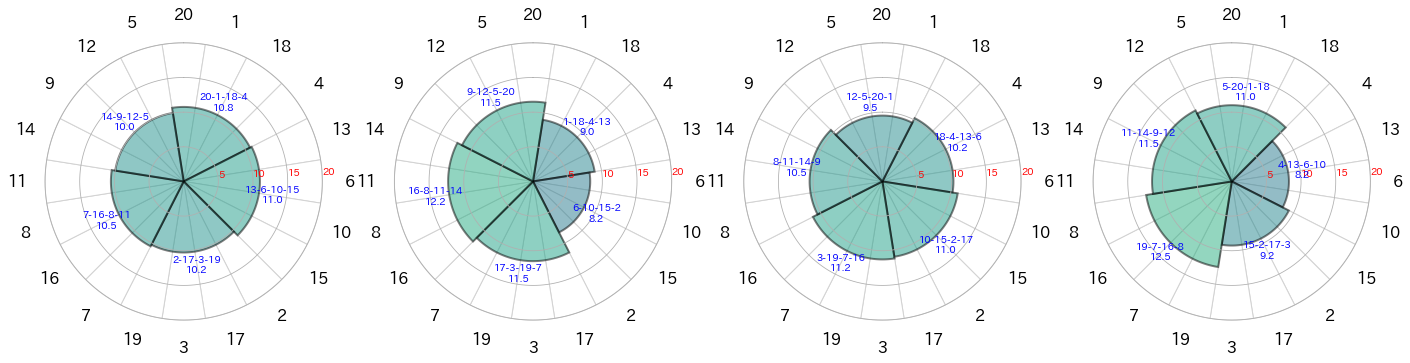

In [73]:
num = 4
fig, ax = plt.subplots(1, num, figsize=(num*one_board, one_board), subplot_kw=dict(polar=True))
for i in range(num):
    plot(calc_e(num, i, True), ax[i])
# fig, ax = plt.subplots(2, 2, figsize=(4*one_board, 4*one_board), subplot_kw=dict(polar=True))
# for i in range(num):
#     plot(calc_e(num, i, True), ax[i//2, i%2])
plt.show()
#plt.savefig('4.jpg', bbox_inches='tight', pad_inches=0)

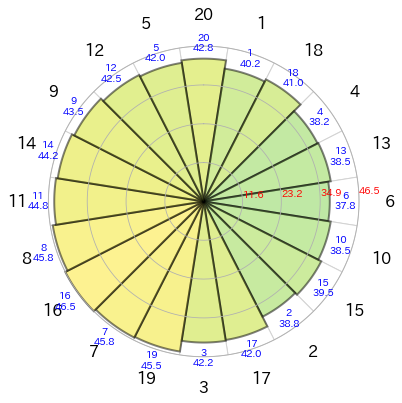

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(one_board, one_board), subplot_kw=dict(polar=True))
plot2(calc_e_ww(num), ax)
plt.show()
#plt.savefig('4w.jpg')

In [75]:
best_exp = []
for window in range(1, 5):
    all_exp = []
    for residual in range(window):
        all_exp += calc_e(window, residual, False)
    all_ = np.array(all_exp)
    sorted_exp = np.argsort(all_[:, 1].astype(float))
    sorted_all = all_[sorted_exp]
#     print(sorted_all)
    best_exp.append(sorted_all[-1][0])
#     break

print()
print(best_exp)


['20', '19-7', '19-7-16', '19-7-16-8']


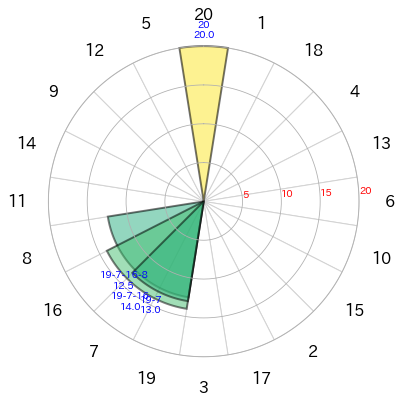

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(one_board, one_board), subplot_kw=dict(polar=True))
plot(list(reversed(best_exp)), ax)
plt.show()
#plt.savefig('best.jpg')